# Intro a NX

En este notebook hago mis primeras exploraciones con NX.

In [60]:
import matplotlib.pyplot as plt

## Nodos

Cómo crear una gráfica y añadir nodos

In [2]:
import networkx as nx
G = nx.Graph()

In [4]:
#Veo que G es una nueva clase no predeterminada de Python
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [10]:
#Añadimos nodos
G.add_nodes_from([2, 3, "a"])
print(G)

Graph with 4 nodes and 0 edges


Como $G$ es un nuevo tipo de estructura, cuando la definimos estamos actuando sobre el objeto. Si añades un nodo, no reemplazas lo ya existente. Añades más información a la misma. Sin embargo, si intentas añadir un nodo que ya estaba definido, no se modifica ni se duplica

In [12]:
#Con esto podemos ver los nodos de la gráfica
G.nodes

NodeView((1, 2, 3, 'a'))

Podemos añadir nodos pareados con atributos. El formato es: Contenedor > 2-tuplas. Y cada 2-tupla tiene nodo más diccionario con el atributo. 

In [16]:
G.add_nodes_from([(5,{"Sonido": "Pop"}),(6,{"Sonido": "Metal"})])

#Nótese que no se hace referencia a los atributos de los nodos
print(G.nodes)

[1, 2, 3, 'a', 5, 6]


Podemos agregar los nodos de una gráfica a otra gráfica:

In [19]:
H = nx.Graph()
H.add_node("new")
print(H.nodes)

['new']


In [21]:
H.add_nodes_from(G)
print(H.nodes)

['new', 1, 2, 3, 'a', 5, 6]


Nótese que al añadir los nuevos nodos se agregan al final, tal como lo esperaríamos si de un agregado directo se tratara. **Además** podemos usar _una gráfica_ como nodo.

In [24]:
G.add_node(H)
print(G.nodes)

[1, 2, 3, 'a', 5, 6, <networkx.classes.graph.Graph object at 0x7f06fbf9bf10>]


Nótese que se agrega como objeto a la gráfica.

## Aristas

Podemos agregar aristas. 

In [25]:
J = nx.Graph()

In [28]:
J.add_edge(1,2)
print(J.nodes)
#Nótese que podemos agregar los aristas entre nodos no existentes. Al definir las aristas estamos definiendo los noods
#que los unen

[1, 2]


In [33]:
J.add_nodes_from([3,4])
print(J.nodes)
J.add_edge(3,4)

#También podemos agrear aristas a nodos ya existentes
print(J.edges)

[1, 2, 3, 4]
[(1, 2), (3, 4)]


Es posible agregar aristas (en plural) en una sola operación, así como agregábamos nodos (en plural) en una sola operación. Necesitamos un contenedor con 2-tuplas indicando qué nodos se están conectando o 3-tuplas con dos nodos de conexión y un diccionario con atributos.

In [44]:
J.add_edges_from([(1,3), (1,4)])
print(J.edges)
J.add_edge(2,4)

J.add_edges_from([(2,3,{"Peso":10})])

#Parece ser que para añadir aristas con argumentos necesitamos agregarlo desde el contenedor. 
print(J.edges)

[(1, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]
[(1, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]


Podemos agregar las aristas de otras gráficas

In [46]:
H.add_edges_from(J.edges)
print(H.edges)

[(1, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]


Y podemos limpiar una gráfica:

In [48]:
H.clear()
print(H)

Graph with 0 nodes and 0 edges


Cuando agregamos nodos, dado que se agregan desde un contenedor, no necesariamente se requiere de una lista. Pueden agregarse como nodos, por ejemplo, los caracteres de una string. 

In [50]:
H.add_nodes_from("nodos")
print(H.nodes)

['n', 'o', 'd', 's']


Y nótese que aquí, a pesar de tener dos letras _o_ no se agregan doblemente. 

## Operaciones básicas
Hay cuatro cosas básicas que nos pueden interesar.

Dada una gráfica podemos querer conocer:

- Sus nodos
- Sus aristas

Dado un nodo nos puede interesar conocer:

- Su grado (número de aristas incidentes en él)
- Sus vecinos

In [57]:
K = nx.Graph()
K.add_edges_from([(0,1),(0,2),(1,3),(2,3),(3,1)])
print("Nodos: " + str(K.nodes) + ", Aristas: " +  str(K.edges))

#Ahora conocemos los vecinos y el grado del nodo 3
print(K.adj[3])
print(K.degree[3])

Nodos: [0, 1, 2, 3], Aristas: [(0, 1), (0, 2), (1, 3), (2, 3)]
{1: {}, 2: {}}
2


En el caso anterior obtuvimos la información como vista de lecura. Sin embargo, podemos almacernarla en listas, conjuntos, diccionarios, tuplas u otros contenedores.

In [59]:
list(K.adj[3]) #Nos da una lista con los vecinos del nodo 3

[1, 2]

Puede especificarse un subconjunto de nodos de la gráfica para obtener información de ellos.

## Otras operaciones

Otras operaciones que nos pueden interesar son:

- Borrado de información
- Usado de constructores
- Qué usar como nodos y aristas
- Acceso a aristas y vecinos
- Gráficas dirigidas

## Visualización

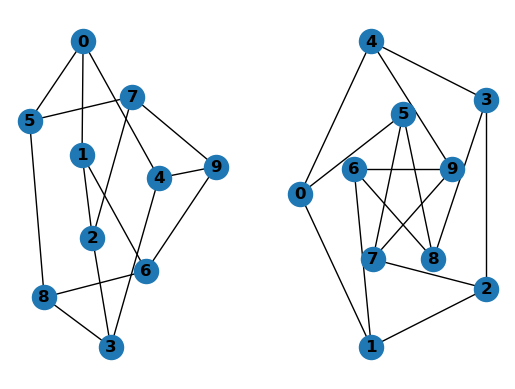

In [63]:
#Para ver si la importanción con matplotlib.pyplot funcionó

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

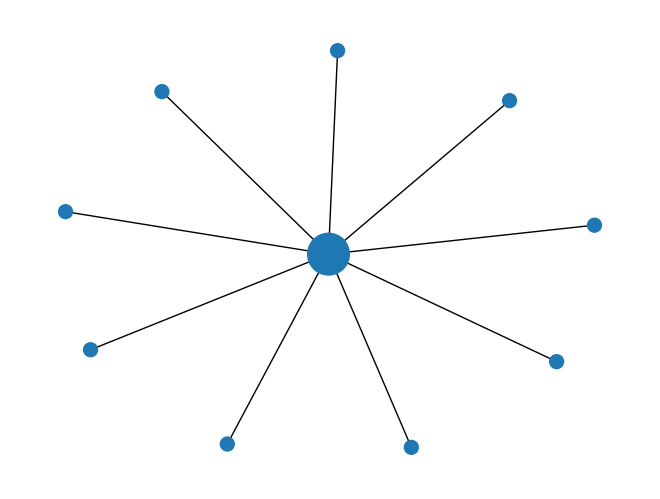

In [85]:
g = nx.Graph()
g.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(0,8),(0,9)])
d = dict(g.degree)


nx.draw(g, nodelist = d.keys(), node_size = [v * 100 for v in d.values()])